This line imports the drive module from the google.colab package. Google Colab provides this module to interact with your Google ***Drive***

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***second step***

some  library is


1.   Import the NumPy library, commonly used for numerical computations, and use the alias "np" for brevity.
2.    Import the "Sequential" class from Keras, used to create a linear stack of layer


3.   Import various layer types for building neural networks.
4.   Import the "to_categorical" function to convert labels into one-hot encoded format.





In [22]:


import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical





# ***Third step***
Load dataset

In [ ]:
# Load the data files
train_images = np.load('/content/drive/My Drive/dataset/train_images.npy')
train_labels = np.load('//content/drive/My Drive/dataset/train_labels.npy')
test_images = np.load('//content/drive/My Drive/dataset/test_images.npy')
test_labels = np.load('//content/drive/My Drive/dataset/test_labels.npy')

train_images = train_images.reshape(-1, 48, 48, 1): Reshape the training images to have a 4-dimensional shape, with the first dimension as the batch size, followed by height, width, and channels (1 in this case for grayscale).

test_images = test_images.reshape(-1, 48, 48, 1): Reshape the test images similarly.

train_images = train_images.astype('float32') / 255.0: Normalize the pixel values of training images to be between 0 and 1 by dividing by 255.

test_images = test_images.astype('float32') / 255.0: Normalize the pixel values of test images similarly.

train_labels -= 1: Decrement the labels of training data by 1. This is done to convert the label values from 1-based indexing to 0-based indexing (e.g., from 1-7 to 0-6).

test_labels -= 1: Decrement the labels of test data similarly.

num_classes = 7: Set the number of classes in the dataset.

train_labels_onehot = to_categorical(train_labels, num_classes): Convert the training labels to one-hot encoded format, representing the classes as binary vectors.

test_labels_onehot = to_categorical(test_labels, num_classes): Convert the test labels to one-hot encoded format.

Model Definition: Create a sequential model using Keras, which is a linear stack of layers. The model consists of Convolutional and Dense layers for image classification.

model.compile(...): Configure the model for training by specifying the loss function, optimizer, and evaluation metrics.

model.fit(...): Train the model using the training data and labels. It runs for 10 epochs (iterations) with a batch size of 32 and a validation split of 20% (0.2) for validation during training.

loss, accuracy = model.evaluate(...): Evaluate the model's performance on the test data using the test images and one-hot encoded labels.

print(f'Test Loss: {loss}, Test Accuracy: {accuracy}'): Print the test loss and accuracy obtained from the evaluation step.

In [35]:

train_images = train_images.reshape(-1, 48, 48, 1)
test_images = test_images.reshape(-1, 48, 48, 1)


train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

train_labels -= 1
test_labels -= 1


num_classes = 7
train_labels_onehot = to_categorical(train_labels, num_classes)
test_labels_onehot = to_categorical(test_labels, num_classes)


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, kernel_size=(5, 5), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_images, train_labels_onehot, batch_size=32, epochs=10, validation_split=0.2)


loss, accuracy = model.evaluate(test_images, test_labels_onehot)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

Epoch 1/10
718/718 [==============================] - 480s 667ms/step - loss: 1.6251 - accuracy: 0.3113 - val_loss: 5.2421 - val_accuracy: 0.0000e+00
Epoch 2/10
718/718 [==============================] - 495s 689ms/step - loss: 1.6149 - accuracy: 0.3141 - val_loss: 4.9721 - val_accuracy: 0.0000e+00
Epoch 3/10
718/718 [==============================] - 502s 699ms/step - loss: 1.6136 - accuracy: 0.3141 - val_loss: 6.0695 - val_accuracy: 0.0000e+00
Epoch 4/10
718/718 [==============================] - 503s 701ms/step - loss: 1.6134 - accuracy: 0.3141 - val_loss: 6.1745 - val_accuracy: 0.0000e+00
Epoch 5/10
718/718 [==============================] - 467s 650ms/step - loss: 1.6126 - accuracy: 0.3141 - val_loss: 6.0378 - val_accuracy: 0.0000e+00
Epoch 6/10
718/718 [==============================] - 477s 664ms/step - loss: 1.6130 - accuracy: 0.3141 - val_loss: 6.2256 - val_accuracy: 0.0000e+00
Epoch 7/10
718/718 [==============================] - 481s 669ms/step - loss: 1.6120 - accuracy: 0.3

predictions = model.predict(test_images): It uses a trained model (model) to make predictions on a set of test images (test_images). The predictions are stored in the predictions variable.

The display_images_with_labels function is defined, which takes three arguments: images, labels, and predictions.

fig, axes = plt.subplots(2, 5, figsize=(15, 8)): This line creates a grid of 2 rows and 5 columns for displaying images with their predicted and actual labels. The fig is the entire figure, and axes contains the individual subplots (2 rows, 5 columns).

fig.suptitle('Images with Predicted and Actual Labels', fontsize=16): Sets the main title for the entire figure.

The for loop iterates over the first 10 images (images[:10]) to display them along with their predicted and actual labels.

ax.imshow(images[i].reshape(48, 48), cmap='gray'): Displays the image at the current index (i) in the subplot, reshaped to a 48x48 size and using the grayscale colormap.

predicted_label = np.argmax(predictions[i]): Calculates the predicted label for the current image by finding the index of the maximum value in the i-th element of the predictions array.

actual_label = np.argmax(labels[i]): Calculates the actual label for the current image by finding the index of the maximum value in the i-th element of the labels array (assumed to be one-hot encoded).

ax.set_title(f'Predicted: {predicted_label}, Actual: {actual_label}'): Sets the title for the current subplot, displaying the predicted and actual labels.

ax.set_xticks([]) and ax.set_yticks([]): Removes the x and y-axis ticks from the subplots for a cleaner visualization.

plt.show(): Displays the figure with all the subplots, showing the test images, their predicted labels, and their actual labels.

Finally, the function display_images_with_labels is called with the first 10 test images (test_images[:10]), their corresponding one-hot encoded labels (test_labels_onehot[:10]), and the predictions (predictions[:10]) obtained from the model. This will visualize the images along with their predicted and actual labels for quick inspection and evaluation.

225/225 [==============================] - 16s 69ms/step


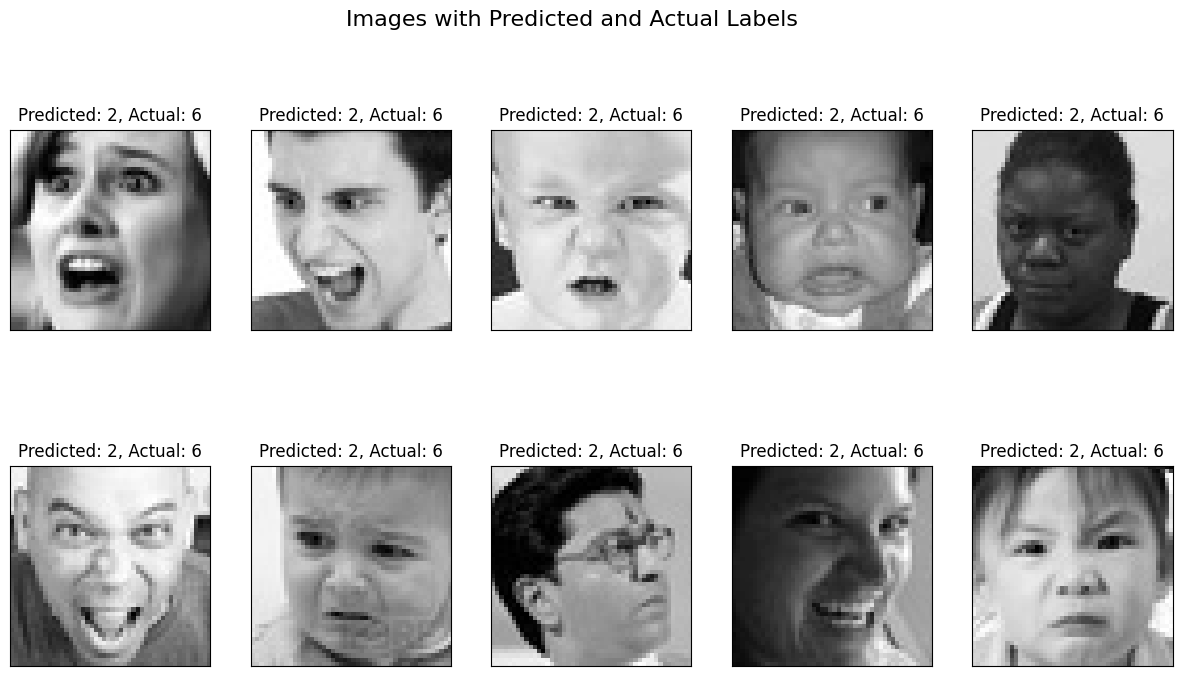

In [27]:

predictions = model.predict(test_images)
import matplotlib.pyplot as plt

def display_images_with_labels(images, labels, predictions):
    fig, axes = plt.subplots(2, 5, figsize=(15, 8))
    fig.suptitle('Images with Predicted and Actual Labels', fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(48, 48), cmap='gray')
        predicted_label = np.argmax(predictions[i])
        actual_label = np.argmax(labels[i])
        ax.set_title(f'Predicted: {predicted_label}, Actual: {actual_label}')
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

display_images_with_labels(test_images[:10], test_labels_onehot[:10], predictions[:10])


225/225 [==============================] - 16s 70ms/step


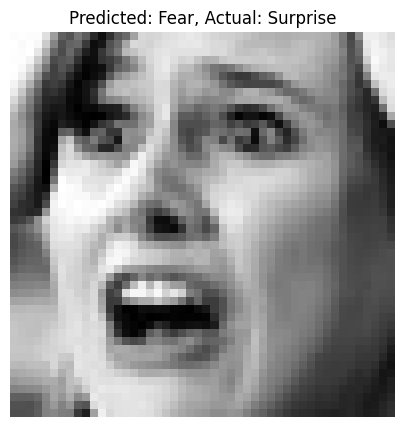

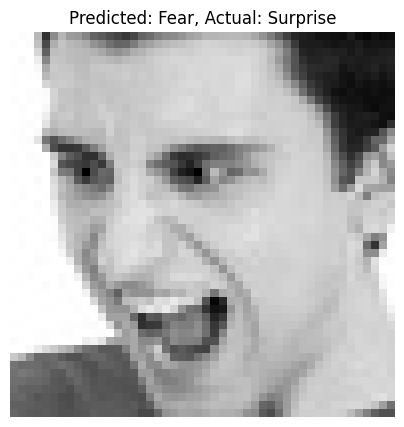

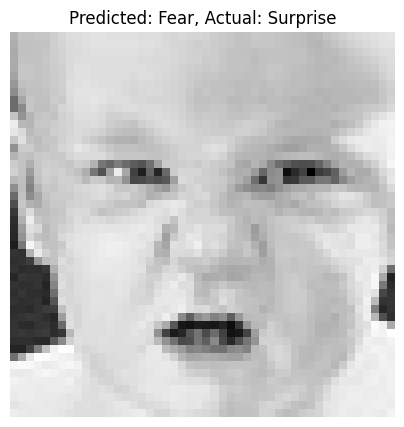

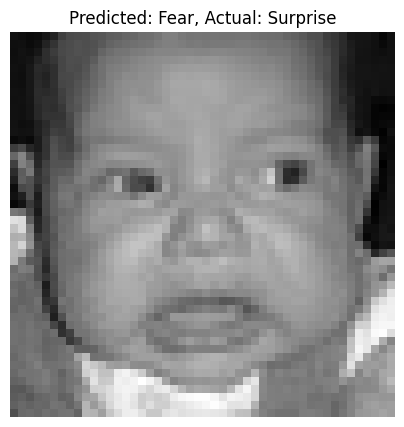

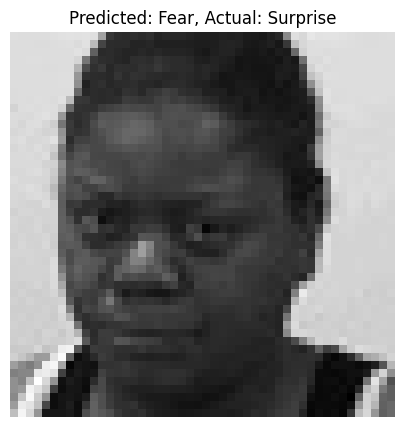

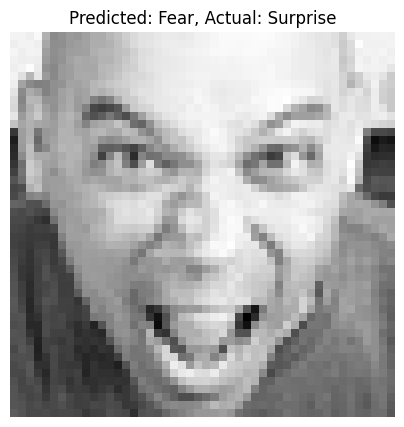

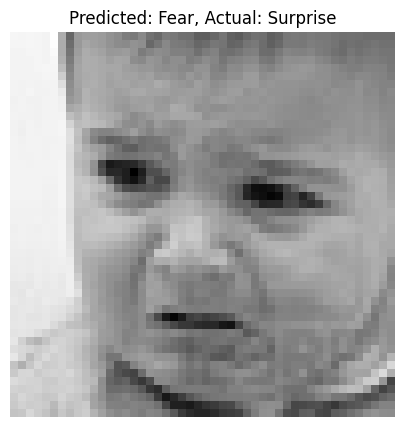

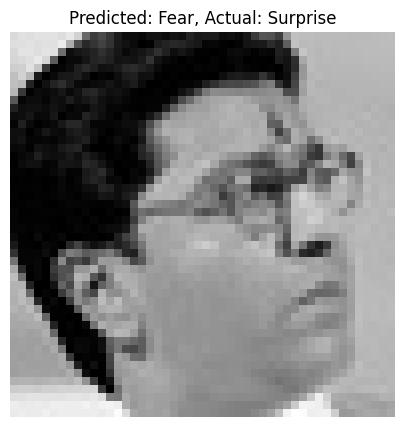

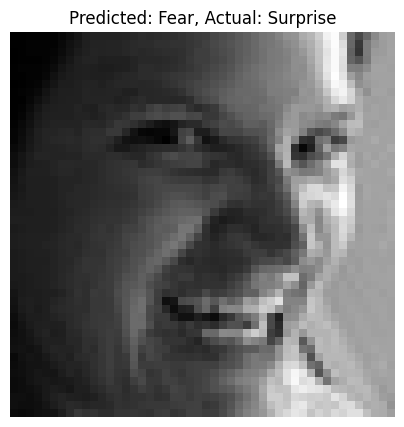

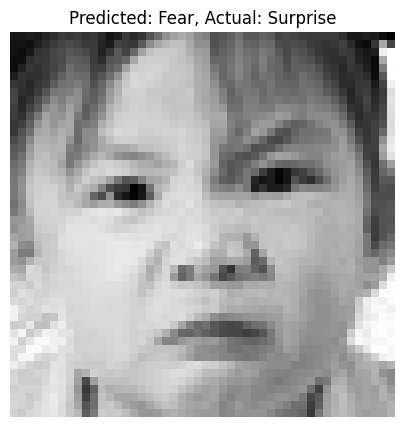

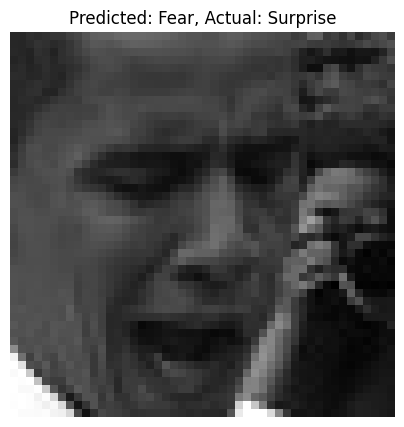

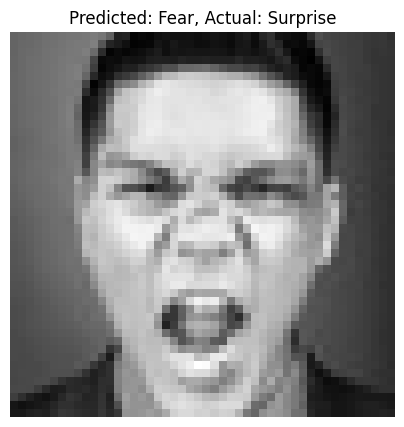

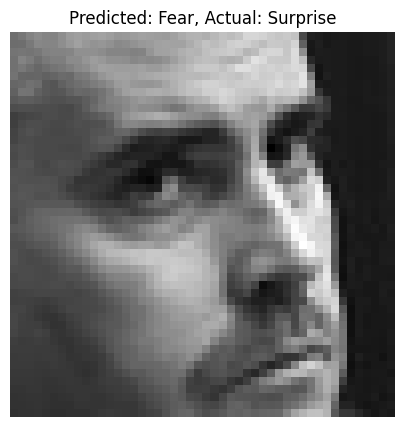

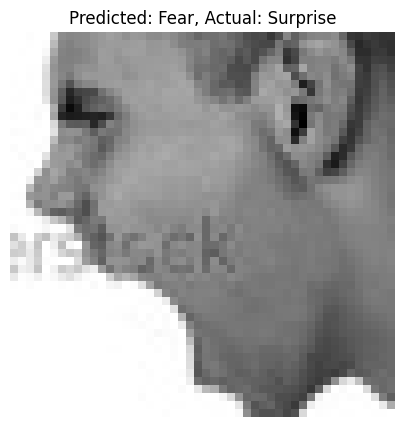

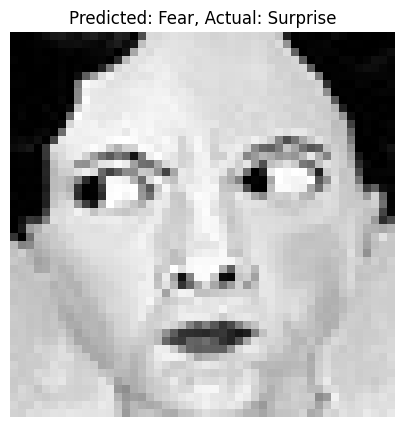

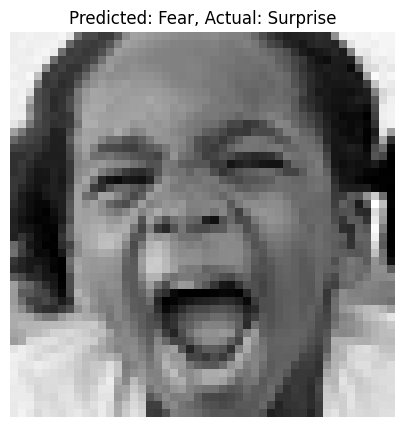

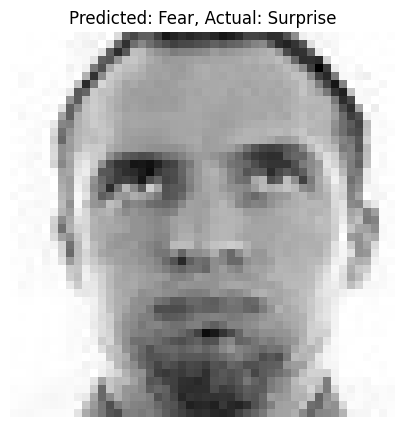

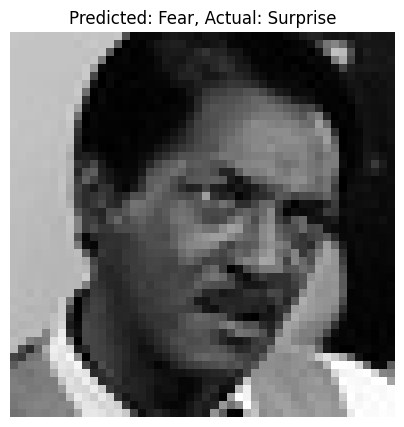

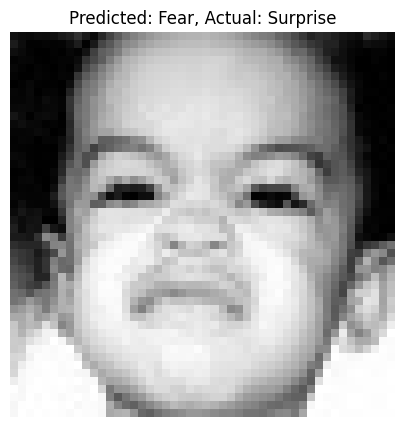

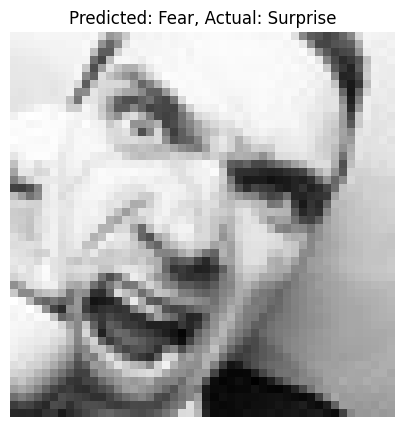

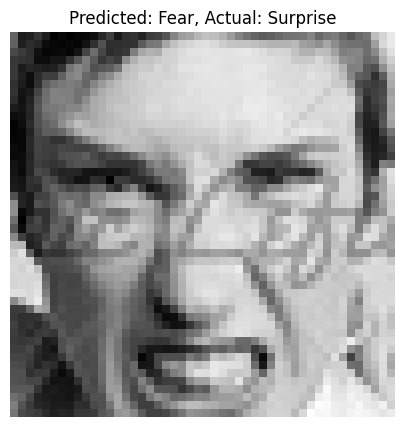

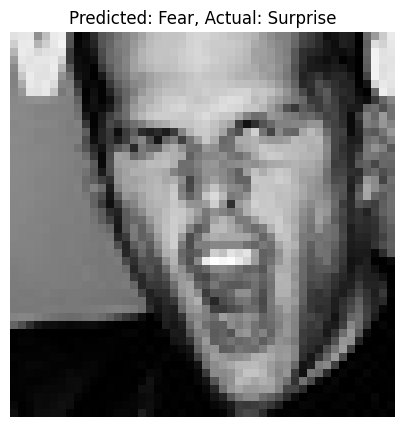

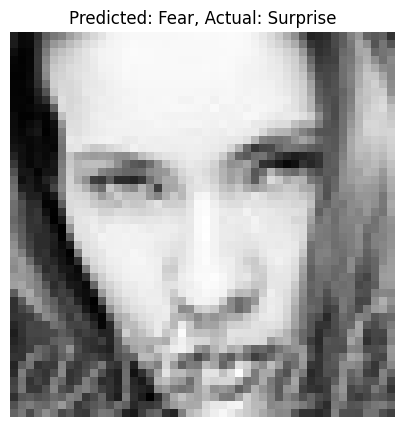

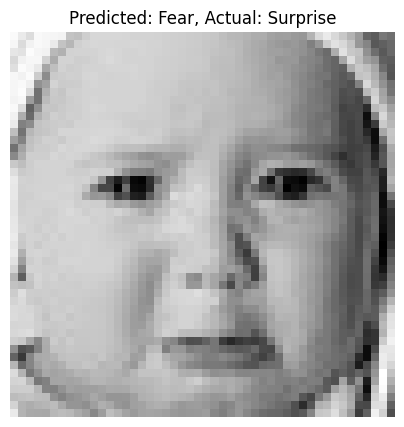

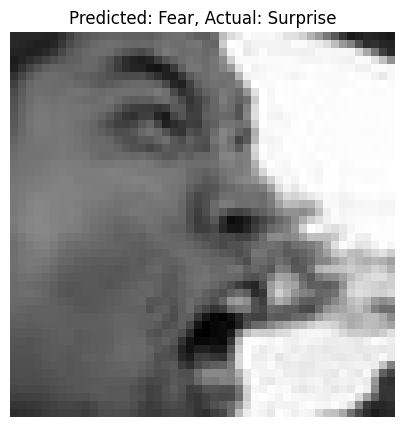

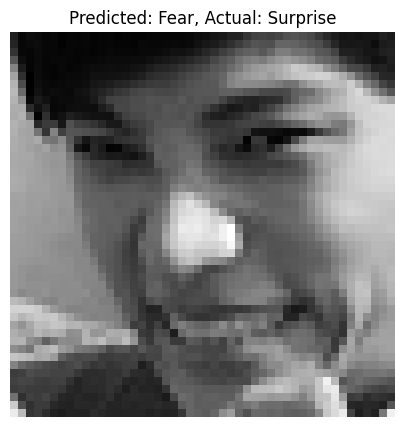

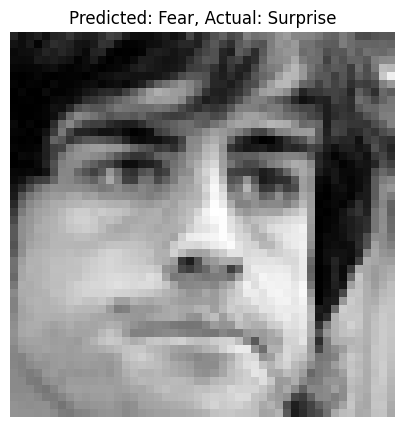

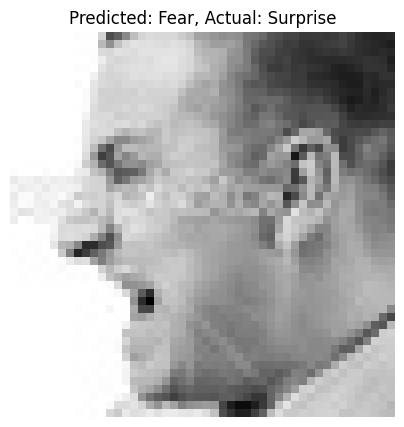

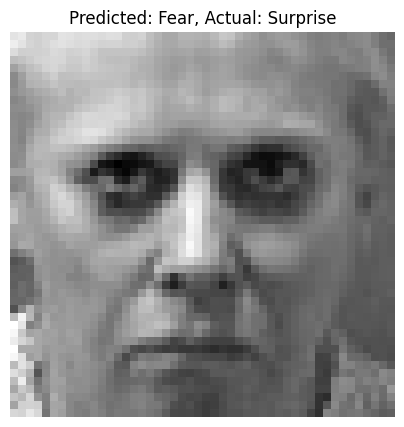

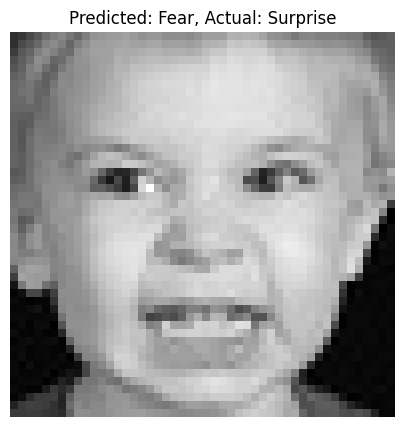

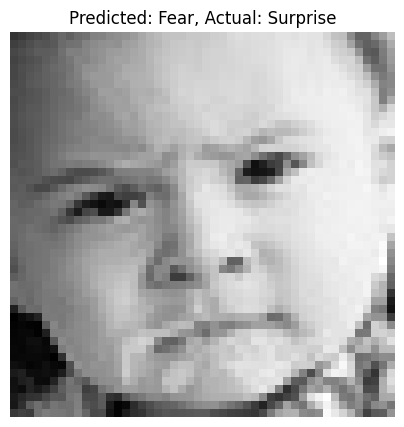

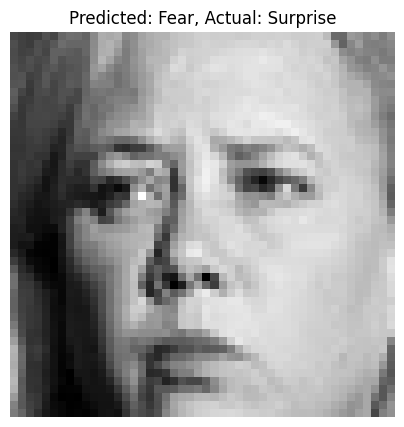

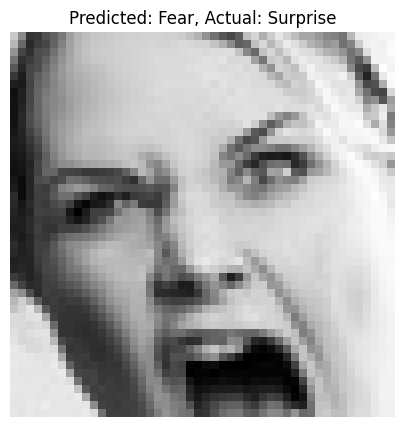

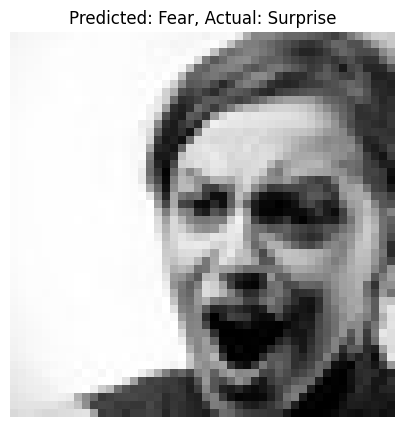

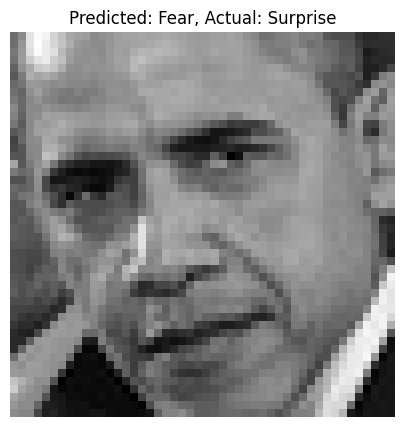

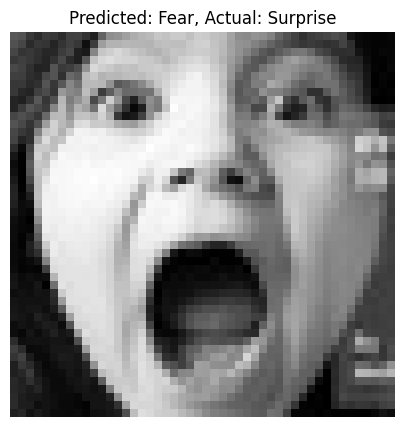

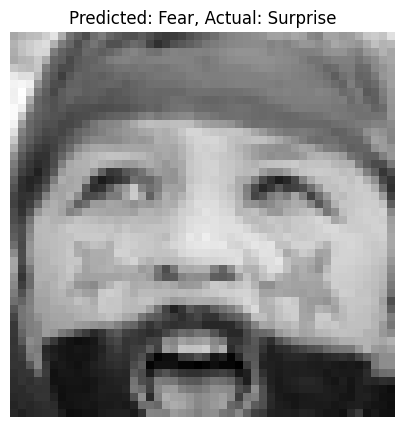

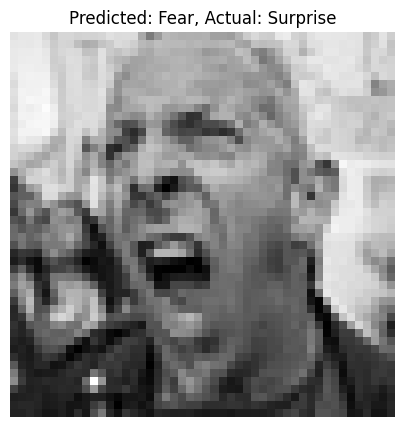

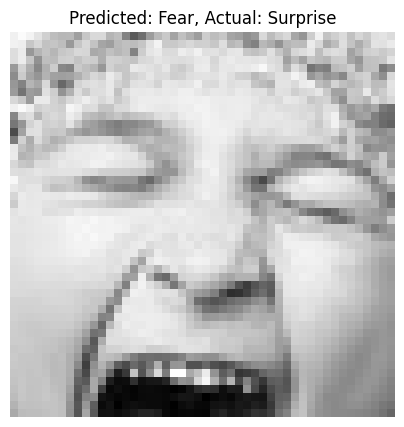

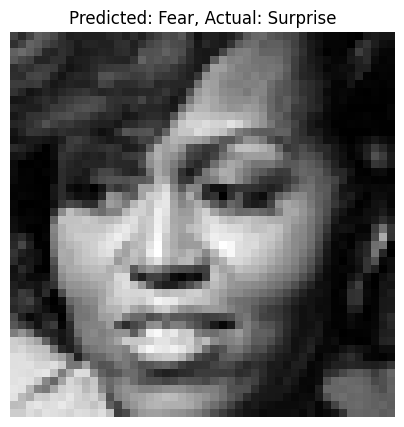

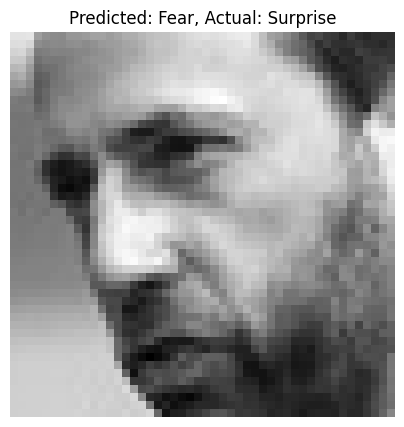

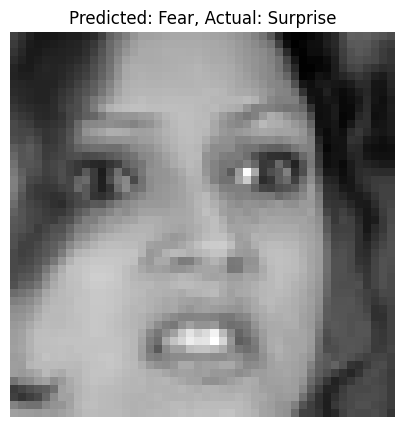

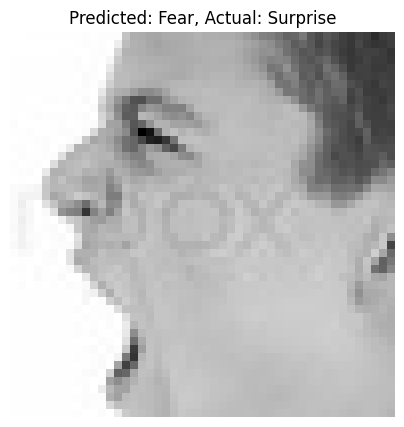

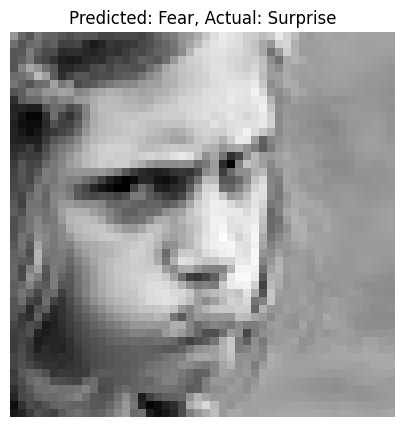

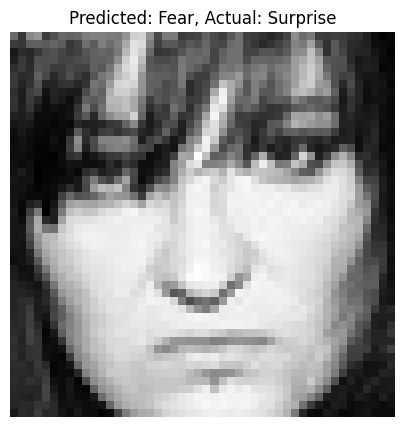

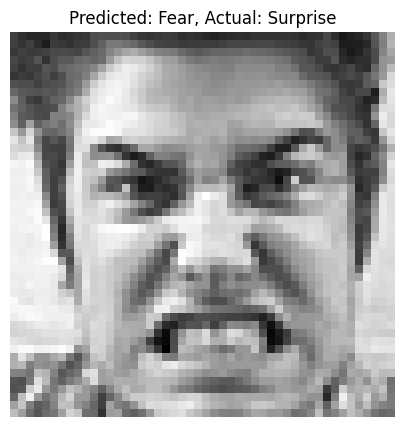

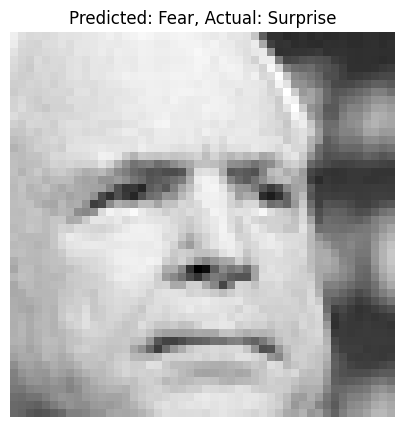

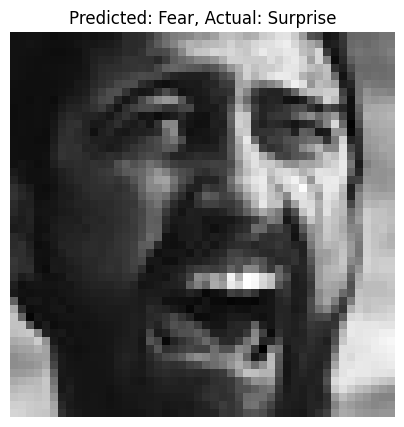

In [30]:
predicted_labels_onehot = model.predict(test_images)
predicted_labels = np.argmax(predicted_labels_onehot, axis=1)
actual_labels = np.argmax(test_labels_onehot, axis=1)

class_names = ["Angry", "Disgust", "Fear", "Happy", "Neutral", "Sad", "Surprise"]

for i in range(len(test_images[10])):
    plt.figure(figsize=(5, 5))
    plt.imshow(np.squeeze(test_images[i]), cmap='gray')
    plt.title(f"Predicted: {class_names[predicted_labels[i]]}, Actual: {class_names[actual_labels[i]]}")
    plt.axis('off')
    plt.show()






